In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')

import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

from IPython.display import display

In [9]:
data = pd.read_csv('movie_metadata.csv')

In [10]:
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [11]:
data.shape

(5043, 28)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [13]:
data = data.drop(['color', 
                      'director_facebook_likes', 
                      'actor_3_facebook_likes', 
                      'actor_1_facebook_likes', 
                      'cast_total_facebook_likes', 
                      'actor_2_facebook_likes',  
                      'facenumber_in_poster', 
                      'content_rating', 
                      'country', 
                      'movie_imdb_link', 
                      'aspect_ratio',
                      'plot_keywords',
                      ], 
                       axis = 1)

In [14]:
data.columns

Index(['director_name', 'num_critic_for_reviews', 'duration', 'actor_2_name',
       'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users',
       'actor_3_name', 'num_user_for_reviews', 'language', 'budget',
       'title_year', 'imdb_score', 'movie_facebook_likes'],
      dtype='object')

In [16]:
data.isnull().any()

director_name              True
num_critic_for_reviews     True
duration                   True
actor_2_name               True
gross                      True
genres                    False
actor_1_name               True
movie_title               False
num_voted_users           False
actor_3_name               True
num_user_for_reviews       True
language                   True
budget                     True
title_year                 True
imdb_score                False
movie_facebook_likes      False
dtype: bool

In [18]:
data.isnull().sum()

director_name             104
num_critic_for_reviews     50
duration                   15
actor_2_name               13
gross                     884
genres                      0
actor_1_name                7
movie_title                 0
num_voted_users             0
actor_3_name               23
num_user_for_reviews       21
language                   12
budget                    492
title_year                108
imdb_score                  0
movie_facebook_likes        0
dtype: int64

In [23]:
round(100*(data.isnull().sum()/len(data.index)), 2)

director_name              2.06
num_critic_for_reviews     0.99
duration                   0.30
actor_2_name               0.26
gross                     17.53
genres                     0.00
actor_1_name               0.14
movie_title                0.00
num_voted_users            0.00
actor_3_name               0.46
num_user_for_reviews       0.42
language                   0.24
budget                     9.76
title_year                 2.14
imdb_score                 0.00
movie_facebook_likes       0.00
dtype: float64

In [24]:
data = data[~np.isnan(data['gross'])]
data = data[~np.isnan(data['budget'])]

#data = data[~np.isnan(data['actor_1_name'])]

In [25]:
data.isnull().sum()

director_name              0
num_critic_for_reviews     1
duration                   1
actor_2_name               5
gross                      0
genres                     0
actor_1_name               3
movie_title                0
num_voted_users            0
actor_3_name              10
num_user_for_reviews       0
language                   3
budget                     0
title_year                 0
imdb_score                 0
movie_facebook_likes       0
dtype: int64

In [26]:
data = data[data.isnull().sum(axis=1) <= 2]
data.isnull().sum()

director_name             0
num_critic_for_reviews    1
duration                  1
actor_2_name              2
gross                     0
genres                    0
actor_1_name              0
movie_title               0
num_voted_users           0
actor_3_name              7
num_user_for_reviews      0
language                  3
budget                    0
title_year                0
imdb_score                0
movie_facebook_likes      0
dtype: int64

In [27]:
# using mean for numerical columns
data['num_critic_for_reviews'].fillna(data['num_critic_for_reviews'].mean(), inplace = True)
data['duration'].fillna(data['duration'].mean(), inplace = True)

In [28]:
# using mode for categorical column
data['language'].fillna(data['language'].mode()[0], inplace = True)


In [29]:
# As we know that We cannot use statistical values for imputing the missing values of actor names, so we will replace the 
# actor names with "Unknown Actor"

data['actor_2_name'].fillna('Unknown Actor', inplace = True)
data['actor_3_name'].fillna('Unknown Actor', inplace = True)

In [31]:
data.isnull().sum().sum()

0

In [32]:
data['gross'] = data['gross']/1000000
data['budget'] = data['budget']/1000000

In [33]:
data['Profit'] = data['gross'] - data['budget']

In [34]:
data[['Profit','movie_title']].sort_values(by = 'Profit', ascending  = False).head(10)

,Profit,movie_title
0,523.505847,Avatar
29,502.177271,Jurassic World
26,458.672302,Titanic
3024,449.935665,Star Wars: Episode IV - A New Hope
3080,424.449459,E.T. the Extra-Terrestrial
794,403.279547,The Avengers
17,403.279547,The Avengers
509,377.783777,The Lion King
240,359.544677,Star Wars: Episode I - The Phantom Menace
66,348.316061,The Dark Knight


In [35]:
print("No. of Rows Before Removing Duplicates: ",data.shape[0])

No. of Rows Before Removing Duplicates:  3888


In [36]:
data.drop_duplicates(subset = None, keep = 'first', inplace = True)

In [40]:
print("No. of Rows After Removing Duplicates: ",data.shape[0])

No. of Rows After Removing Duplicates:  3853


In [41]:
data[['movie_title','Profit']].sort_values(by = 'Profit', ascending  = False).head(10)

,movie_title,Profit
0,Avatar,523.505847
29,Jurassic World,502.177271
26,Titanic,458.672302
3024,Star Wars: Episode IV - A New Hope,449.935665
3080,E.T. the Extra-Terrestrial,424.449459
17,The Avengers,403.279547
509,The Lion King,377.783777
240,Star Wars: Episode I - The Phantom Menace,359.544677
66,The Dark Knight,348.316061
439,The Hunger Games,329.999255


In [42]:
data['language'].value_counts()

English       3673
French          37
Spanish         26
Mandarin        14
German          13
Japanese        12
Hindi           10
Cantonese        8
Italian          7
Portuguese       5
Korean           5
Norwegian        4
Persian          3
Thai             3
Dutch            3
Danish           3
Hebrew           3
Dari             2
Aboriginal       2
Indonesian       2
Aramaic          1
Bosnian          1
Filipino         1
Czech            1
Swedish          1
None             1
Vietnamese       1
Zulu             1
Telugu           1
Romanian         1
Hungarian        1
Icelandic        1
Russian          1
Kazakh           1
Mongolian        1
Maya             1
Arabic           1
Dzongkha         1
Name: language, dtype: int64

In [43]:
def language(x):
    if x == 'English':
        return 'English'
    else:
        return 'Foreign'

# lets apply the function on the language column
data['language'] = data['language'].apply(language)

# lets check the values again
data['language'].value_counts()

English    3673
Foreign     180
Name: language, dtype: int64

In [44]:
data['duration'].value_counts()

101.0    113
100.0    109
98.0     105
99.0      97
90.0      97
        ... 
216.0      1
240.0      1
65.0       1
45.0       1
225.0      1
Name: duration, Length: 157, dtype: int64

In [45]:
def duration(x):
    if x <= 120:
        return 'Short'
    else:
        return 'Long'
    
# lets apply this function on the duration column
data['duration'] = data['duration'].apply(duration)

# lets check the values of Duration column
data['duration'].value_counts()

Short    2936
Long      917
Name: duration, dtype: int64

In [46]:
data['genres'].value_counts()

Drama                                       153
Comedy|Drama|Romance                        151
Comedy|Drama                                147
Comedy                                      145
Comedy|Romance                              135
                                           ... 
Adventure|Comedy|Fantasy|Music|Sci-Fi         1
Action|Adventure|Family|Fantasy|Thriller      1
Drama|Fantasy|Sci-Fi                          1
Action|Fantasy|Western                        1
Adventure|Comedy|Drama|Family|Mystery         1
Name: genres, Length: 762, dtype: int64

In [47]:
data['genres'].str.split('|')[0]

['Action', 'Adventure', 'Fantasy', 'Sci-Fi']

In [48]:
data['Moviegenres'] = data['genres'].str.split('|')
data['Genre1'] = data['Moviegenres'].apply(lambda x: x[0])

# Some of the movies have only one genre. In such cases, assign the same genre to 'genre_2' as well
data['Genre2'] = data['Moviegenres'].apply(lambda x: x[1] if len(x) > 1 else x[0])
data['Genre3'] = data['Moviegenres'].apply(lambda x: x[2] if len(x) > 2 else x[0])
data['Genre4'] = data['Moviegenres'].apply(lambda x: x[3] if len(x) > 3 else x[0])

# lets check the head of the  data
data[['genres','Genre1','Genre2','Genre3','Genre4']].head(5)

,genres,Genre1,Genre2,Genre3,Genre4
0,Action|Adventure|Fantasy|Sci-Fi,Action,Adventure,Fantasy,Sci-Fi
1,Action|Adventure|Fantasy,Action,Adventure,Fantasy,Action
2,Action|Adventure|Thriller,Action,Adventure,Thriller,Action
3,Action|Thriller,Action,Thriller,Action,Action
5,Action|Adventure|Sci-Fi,Action,Adventure,Sci-Fi,Action


   index                          movie_title  Social_Media_Popularity
0     10  Batman v Superman: Dawn of Justice               1599.794424
1    150                        Ghostbusters               1076.336425
2   1582                        Ghostbusters               1075.827482
3     96                        Interstellar               1024.560802
4   3015               10 Days in a Madhouse                828.025478
5    945                      Into the Woods                692.937200
6     73                       Suicide Squad                652.816996
7   1190                Fifty Shades of Grey                624.306881
8    108                            Warcraft                622.790277
9     92        Independence Day: Resurgence                599.274128


E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


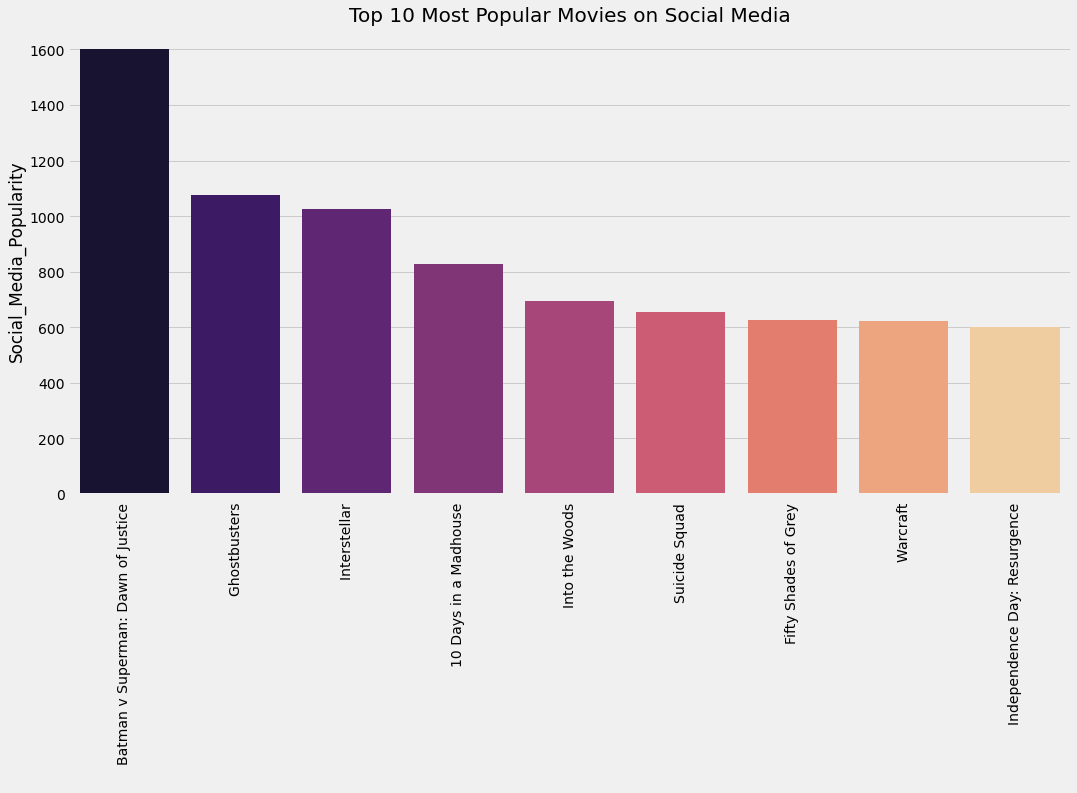

In [49]:
# lets also calculate the Social Media Popularity of a Movie 

# to calculate popularity of a movie, we can aggregate No. of voted users, No. of Users for Reviews, and Facebook Likes.
data['Social_Media_Popularity'] = (data['num_user_for_reviews']/
                                   data['num_voted_users'])*data['movie_facebook_likes']

# lets also check the Top 10 Most Popular Movies on Social Media
x = data[['movie_title','Social_Media_Popularity']].sort_values(by = 'Social_Media_Popularity',
                                                                ascending = False).head(10).reset_index()
print(x)

sns.barplot(x['movie_title'], x['Social_Media_Popularity'], palette = 'magma')
plt.title('Top 10 Most Popular Movies on Social Media', fontsize = 20)
plt.xticks(rotation = 90, fontsize = 14)
plt.xlabel(' ')
plt.show()

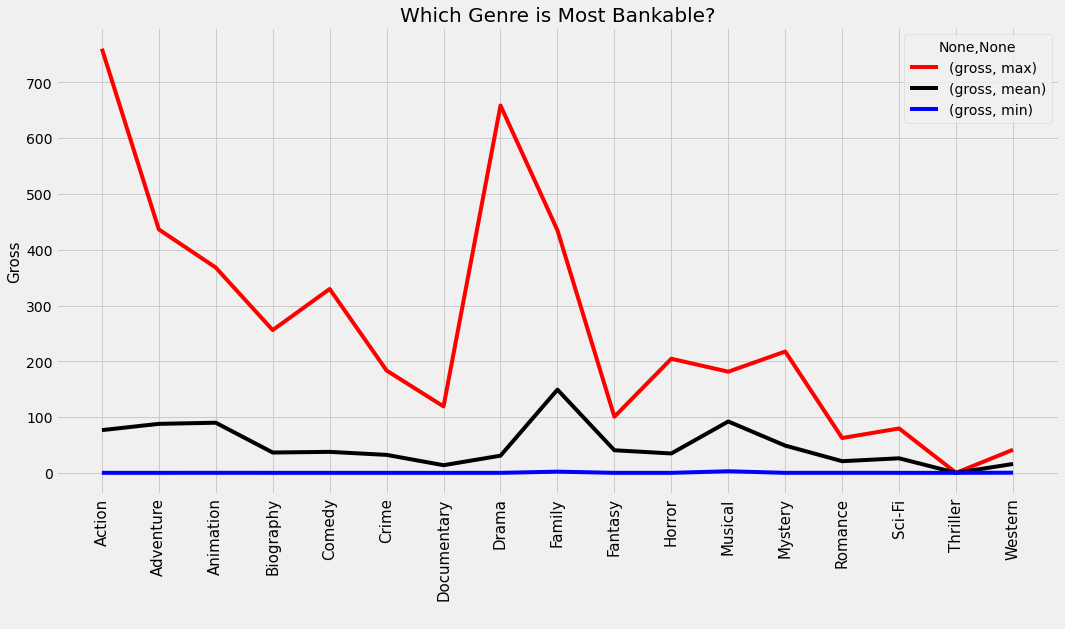

The Most Profitable Movie from each Genre


,Genre1,movie_title,gross
0,Action,Avatar,760.505847
509,Adventure,The Lion King,422.783777
521,Animation,Despicable Me 2,368.049635
1403,Biography,The Blind Side,255.950375
836,Comedy,Forrest Gump,329.691196
3466,Crime,The Godfather,134.821952
3583,Documentary,Fahrenheit 9/11,119.078393
26,Drama,Titanic,658.672302
3080,Family,E.T. the Extra-Terrestrial,434.949459
2485,Fantasy,The Others,96.471845


In [51]:
# Lets compare the Gross with Genres

# first group the genres and get max, min, and avg gross of the movies of that genre.)
display(data[['Genre1','gross',]].groupby(['Genre1']).agg(['max','mean','min']).style.background_gradient(cmap = 'Wistia'))

# lets plot these values using lineplot
data[['Genre1','gross',]].groupby(['Genre1']).agg(['max','mean','min']).plot(kind = 'line', color = ['red','black','blue'])
plt.title('Which Genre is Most Bankable?', fontsize = 20)
plt.xticks(np.arange(17), ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'Western'], rotation = 90, fontsize = 15)
plt.ylabel('Gross', fontsize = 15)
plt.xlabel(' ',)
plt.show()

print('The Most Profitable Movie from each Genre')
display(data.loc[data.groupby(data['Genre1'])['Profit'].idxmax()][['Genre1',
                                    'movie_title','gross']].style.background_gradient(cmap = 'copper'))

Most Profitable Years in Box Office


E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


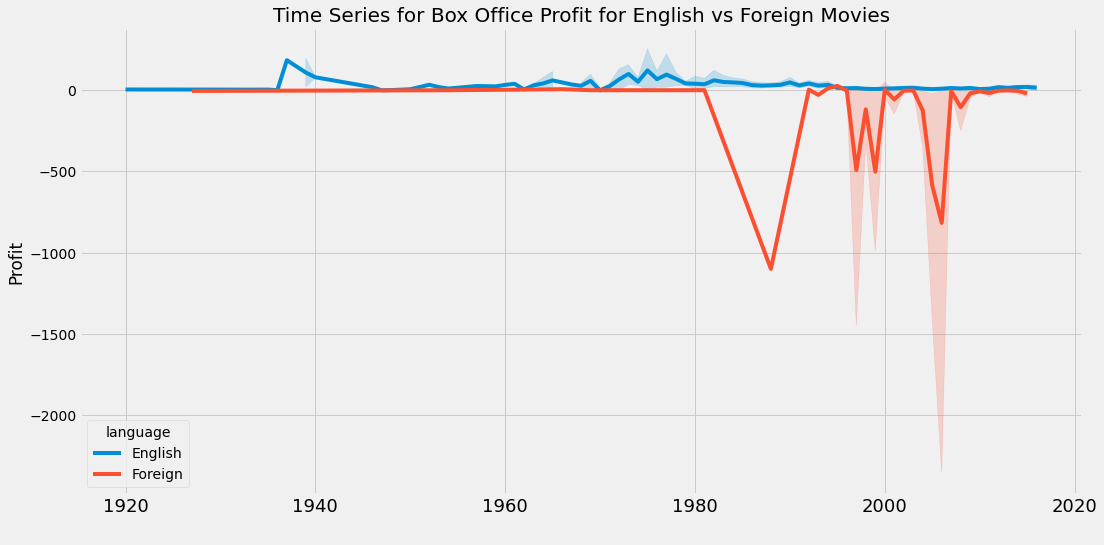

Movies that Made Huge Losses


,movie_title,language,Profit
2323,Princess Mononoke,Foreign,-2397.701809
2334,Steamboy,Foreign,-2127.109510
2988,The Host,Foreign,-12213.298588
3005,Fateless,Foreign,-2499.804112
3859,Lady Vengeance,Foreign,-4199.788333


In [52]:
# lets convert year into integer
data['title_year'] = data['title_year'].astype('int')

print('Most Profitable Years in Box Office')
display(data[['title_year','language','Profit']].groupby(['language',
                                    'title_year']).agg('sum').sort_values(by = 'Profit',
                                     ascending = False).head(10).style.background_gradient(cmap = 'Greens'))

# lets plot them
sns.lineplot(data['title_year'], data['Profit'], hue = data['language'])
plt.title('Time Series for Box Office Profit for English vs Foreign Movies', fontsize = 20)
plt.xticks(fontsize = 18)
plt.xlabel(' ')
plt.show()

print("Movies that Made Huge Losses")
display(data[data['Profit'] < -2000][['movie_title',
                        'language','Profit']].style.background_gradient(cmap = 'Reds'))

,movie_title,duration,gross,Profit
0,Avatar,Long,760.505847,523.505847
29,Jurassic World,Long,652.177271,502.177271
26,Titanic,Long,658.672302,458.672302
3024,Star Wars: Episode IV - A New Hope,Long,460.935665,449.935665
17,The Avengers,Long,623.279547,403.279547


,movie_title,duration,gross,Profit
3080,E.T. the Extra-Terrestrial,Short,434.949459,424.449459
509,The Lion King,Short,422.783777,377.783777
812,Deadpool,Short,363.024263,305.024263
521,Despicable Me 2,Short,368.049635,292.049635
338,Finding Nemo,Short,380.838870,286.838870


E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Gross Comparison')

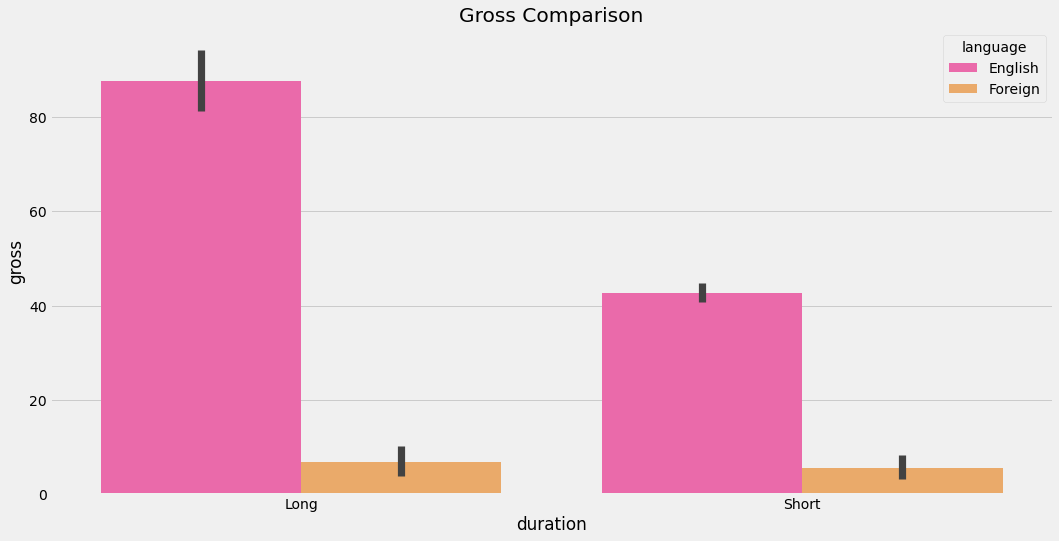

In [53]:
display(data[data['duration'] == 'Long'][['movie_title', 'duration', 'gross',
                    'Profit']].sort_values(by = 'Profit',ascending = False).head(5).style.background_gradient(cmap = 'spring'))

display(data[data['duration'] == 'Short'][['movie_title', 'duration', 'gross',
                    'Profit']].sort_values(by = 'Profit',ascending = False).head(5).style.background_gradient(cmap = 'spring'))

sns.barplot(data['duration'], data['gross'], hue = data['language'], palette = 'spring')
plt.title('Gross Comparison')

Average IMDB Score for Long Duration Movies is 7.06
Average IMDB Score for Short Duration Movies is 6.28

Highest Rated Long Duration Movie
                     movie_title  imdb_score
1937  The Shawshank Redemption          9.3

Highest Rated Short Duration Movie
               movie_title  imdb_score
3592  The Usual Suspects          8.6


E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


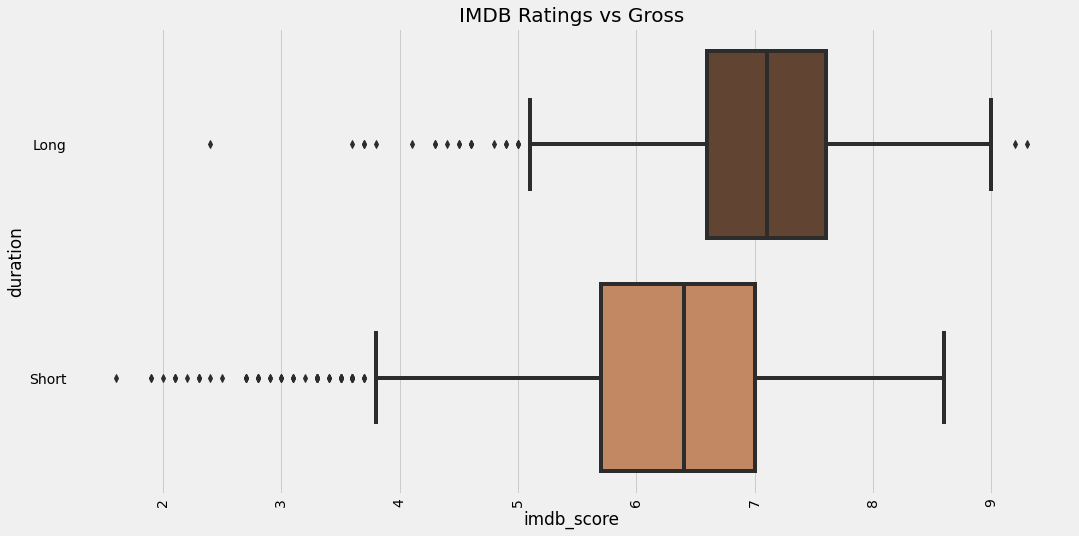

In [54]:
print("Average IMDB Score for Long Duration Movies is {0:.2f}".format(data[data['duration'] == 'Long']['imdb_score'].mean()))
print("Average IMDB Score for Short Duration Movies is {0:.2f}".format(data[data['duration'] == 'Short']['imdb_score'].mean()))

print("\nHighest Rated Long Duration Movie\n", 
    data[data['duration'] == 'Long'][['movie_title','imdb_score']].sort_values(by = 'imdb_score', ascending = False).head(1))
print("\nHighest Rated Short Duration Movie\n", 
    data[data['duration'] == 'Short'][['movie_title','imdb_score']].sort_values(by = 'imdb_score', ascending = False).head(1))

sns.boxplot(data['imdb_score'], data['duration'], palette = 'copper')
plt.title('IMDB Ratings vs Gross', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

In [55]:
def query_actors(x):
    a = data[data['actor_1_name'] == x]
    b = data[data['actor_2_name'] == x]
    c = data[data['actor_3_name'] == x]
    x = a.append(b)
    y = x.append(c)
    
    y = y[['movie_title',
       'budget',
       'gross',
       'title_year',
       'genres',
       'language',
       'imdb_score',
        ]]
    return y

In [56]:
query_actors('Meryl Streep')

,movie_title,budget,gross,title_year,genres,language,imdb_score
410,It's Complicated,85.0,112.703470,2009,Comedy|Drama|Romance,English,6.6
1106,The River Wild,45.0,46.815748,1994,Action|Adventure|Crime|Thriller,English,6.3
1204,Julie & Julia,40.0,94.125426,2009,Biography|Drama|Romance,English,7.0
1408,The Devil Wears Prada,35.0,124.732962,2006,Comedy|Drama|Romance,English,6.8
1483,Lions for Lambs,35.0,14.998070,2007,Drama|Thriller|War,English,6.2
1575,Out of Africa,31.0,87.100000,1985,Biography|Drama|Romance,English,7.2
1618,Hope Springs,30.0,63.536011,2012,Comedy|Drama|Romance,English,6.3
1674,One True Thing,30.0,23.209440,1998,Drama,English,7.0
1925,The Hours,25.0,41.597830,2002,Drama|Romance,English,7.6
2781,The Iron Lady,13.0,29.959436,2011,Biography|Drama|History,English,6.4


In [57]:
def actors_report(x):
    a = data[data['actor_1_name'] == x]
    b = data[data['actor_2_name'] == x]
    c = data[data['actor_3_name'] == x]
    x = a.append(b)
    y = x.append(c)
    print("Time:",y['title_year'].min(), y['title_year'].max())
    print("Max Gross : {0:.2f} Millions".format(y['gross'].max()))
    print("Avg Gross : {0:.2f} Millions".format(y['gross'].mean()))
    print("Min Gross : {0:.2f} Millions".format(y['gross'].min()))
    print("Number of 100 Million Movies :", y[y['gross'] > 100].shape[0])
    print("Avg IMDB Score : {0:.2f}".format(y['imdb_score'].mean()))
    print("Most Common Genres:\n",y['Genre1'].value_counts().head())
    
actors_report('Meryl Streep')

Time: 1985 2014
Max Gross : 143.70 Millions
Avg Gross : 55.23 Millions
Min Gross : 9.66 Millions
Number of 100 Million Movies : 4
Avg IMDB Score : 6.81
Most Common Genres:
 Drama        9
Comedy       7
Adventure    3
Biography    3
Action       1
Name: Genre1, dtype: int64


In [58]:
# Lets compare Brad Pitt, Leonardo Caprio and Tom Cruise

def critically_acclaimed_actors(m):
    a = data[data['actor_1_name'] == m]
    b = data[data['actor_2_name'] == m]
    c = data[data['actor_3_name'] == m]
    x = a.append(b)
    y = x.append(c)
    return y['num_critic_for_reviews'].sum().astype('int')


print("Number of Critics Reviews for Brad Pitt")
display(critically_acclaimed_actors('Brad Pitt'))

print("Number of Critics Reviews for Leonardo DiCaprio")
display(critically_acclaimed_actors('Leonardo DiCaprio'))

print("Number of Critics Reviews for Tom Cruise")
display(critically_acclaimed_actors('Tom Cruise'))

Number of Critics Reviews for Brad Pitt


7814

Number of Critics Reviews for Leonardo DiCaprio


7014

Number of Critics Reviews for Tom Cruise


6740